<a href="https://colab.research.google.com/github/AbdulkadirDogan/PythonData/blob/main/Meilleures_villes_pour_un_workation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Meilleures destinations pour un workation**

## **Introduction**

Nous avons à disposition un fichier csv nommé 'best cities for a workation' dans lequel nous pouvons retrouver des informations concernant les villes dans lesquelles nous pouvons effectuer un workation.
Nous avons :
- Le rang
- La ville
- Le pays
- La vitesse de connection wifi en moyenne
- Nombre d'espace de co-working
- Prix moyen d'un café
- Prix moyen du taxi par km
- Prix moyen de 2 bières dans un bar
- Prix moyen d'un appartement une chambre par mois
- Prix moyen d'un restaurant
- Nombre d'heures moyenne de plein soleil
- Nombre de "choses a faire" selon Tripadvisor
- Nombre de Hashtags sur instagram 

Nous allons donc tenter de trouver la ou les villes qui favorisent le plus le workation.

Pour cela nous séparerons notre analyse en plusieurs parties:
- Meilleures villes pour les personnes qui ont un budget serré
- Meilleures villes pour les personnes qui souhaitent une bonne connexion et beaucoup de lieu de travail partagé
- Meilleures villes pour les personnes qui souhaitent beaucoup d'activités et un beau temps

Pour terminer nous fusionnerons les 3 DataFrame entre eux pour trouver des compromis et à la fin peut-être trouver une ville qui entre dans les 3 parties citées ci-dessus.

## **Importation des données**

In [ ]:
#import des librairies python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [ ]:
#import des fichiers
from google.colab import files
uploaded = files.upload()

Saving best cities for a workation.csv to best cities for a workation.csv


In [ ]:
#stockage du csv dans la variable df
df= pd.read_csv(io.BytesIO(uploaded['best cities for a workation.csv']))

## **Nettoyage des données**

In [ ]:
#affichage des 5 premère valeurs du tableau
df.head()

,Ranking,City,Country,Remote connection: Average WiFi speed (Mbps per second),Co-working spaces: Number of co-working spaces,Caffeine: Average price of buying a coffee,Travel: Average price of taxi (per km),After-work drinks: Average price for 2 beers in a bar,Accommodation: Average price of 1 bedroom apartment per month,"Food: Average cost of a meal at a local, mid-level restaurant",Climate: Average number of sunshine hours,Tourist attractions: Number of ‘Things to do’ on Tripadvisor,Instagramability: Number of photos with #
0,1,Bangkok,Thailand,28,117,1.56,0.82,3.08,415.18,1.54,2624,2262,28386616
1,2,New Delhi,India,12,165,1.42,0.19,2.90,179.25,2.90,2685,2019,28528249
2,3,Lisbon,Portugal,33,95,1.56,0.40,3.42,736.19,7.69,2806,1969,10205538
3,4,Barcelona,Spain,37,136,1.59,1.01,5.12,768.46,10.25,2591,2739,62894055
4,5,Buenos Aires,Argentina,17,67,1.22,0.47,2.16,229.55,5.15,2525,1660,21293975


In [ ]:
#différentes informations sur chacune des colonnes
df.describe()

,Ranking,Remote connection: Average WiFi speed (Mbps per second),Co-working spaces: Number of co-working spaces,Caffeine: Average price of buying a coffee,Travel: Average price of taxi (per km),After-work drinks: Average price for 2 beers in a bar,Accommodation: Average price of 1 bedroom apartment per month,"Food: Average cost of a meal at a local, mid-level restaurant",Climate: Average number of sunshine hours,Tourist attractions: Number of ‘Things to do’ on Tripadvisor,Instagramability: Number of photos with #
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,1.470000e+02
mean,73.938776,26.823129,48.435374,2.279796,1.005442,6.204150,719.551020,8.158639,2409.619048,1042.891156,1.883580e+07
std,42.602210,16.386889,50.320897,0.875517,0.561604,3.561373,424.714931,4.382837,662.858446,1139.228765,2.573515e+07
min,1.000000,2.000000,0.000000,0.830000,0.150000,1.080000,83.020000,1.250000,1203.000000,70.000000,4.094700e+05
25%,37.500000,14.500000,13.000000,1.565000,0.545000,3.340000,370.315000,4.800000,1863.000000,457.500000,4.376657e+06
50%,74.000000,25.000000,33.000000,2.340000,0.940000,5.740000,642.770000,8.520000,2468.000000,741.000000,9.950961e+06
75%,110.500000,34.500000,65.500000,2.865000,1.310000,8.570000,933.220000,11.495000,2897.000000,1336.500000,2.151362e+07
max,147.000000,93.000000,318.000000,6.100000,3.000000,17.800000,2171.680000,19.760000,3940.000000,10269.000000,1.507026e+08


In [ ]:
#liste de toutes les colonnes
df.columns

Index(['Ranking', 'City', 'Country',
       'Remote connection: Average WiFi speed (Mbps per second)',
       'Co-working spaces: Number of co-working spaces',
       'Caffeine: Average price of buying a coffee',
       'Travel: Average price of taxi (per km)',
       'After-work drinks: Average price for 2 beers in a bar',
       'Accommodation: Average price of 1 bedroom apartment per month',
       'Food: Average cost of a meal at a local, mid-level restaurant',
       'Climate: Average number of sunshine hours',
       'Tourist attractions: Number of ‘Things to do’ on Tripadvisor',
       'Instagramability: Number of photos with #'],
      dtype='object')

In [ ]:
#informations sur les colonnes du tableau
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Ranking                                                        147 non-null    int64  
 1   City                                                           147 non-null    object 
 2   Country                                                        147 non-null    object 
 3   Remote connection: Average WiFi speed (Mbps per second)        147 non-null    int64  
 4   Co-working spaces: Number of co-working spaces                 147 non-null    int64  
 5   Caffeine: Average price of buying a coffee                     147 non-null    float64
 6   Travel: Average price of taxi (per km)                         147 non-null    float64
 7   After-work drinks: Average price for 2 beers in a bar         

In [ ]:
#affichage de la forme du tableau (lignes, colonnes)
df.shape

(147, 13)

In [ ]:
#somme des élements de valeur nulle dans chacune des colonnes
df.isnull().sum(axis=0)
#nous avons aucune cellule avec une valeur nulle dans aucune des colonnes

Ranking                                                          0
City                                                             0
Country                                                          0
Remote connection: Average WiFi speed (Mbps per second)          0
Co-working spaces: Number of co-working spaces                   0
Caffeine: Average price of buying a coffee                       0
Travel: Average price of taxi (per km)                           0
After-work drinks: Average price for 2 beers in a bar            0
Accommodation: Average price of 1 bedroom apartment per month    0
Food: Average cost of a meal at a local, mid-level restaurant    0
Climate: Average number of sunshine hours                        0
Tourist attractions: Number of ‘Things to do’ on Tripadvisor     0
Instagramability: Number of photos with #                        0
dtype: int64

In [ ]:
#renvoi true si il y'a au moins une valeur nulle dans un colonne
df.isnull().any()

Ranking                                                          False
City                                                             False
Country                                                          False
Remote connection: Average WiFi speed (Mbps per second)          False
Co-working spaces: Number of co-working spaces                   False
Caffeine: Average price of buying a coffee                       False
Travel: Average price of taxi (per km)                           False
After-work drinks: Average price for 2 beers in a bar            False
Accommodation: Average price of 1 bedroom apartment per month    False
Food: Average cost of a meal at a local, mid-level restaurant    False
Climate: Average number of sunshine hours                        False
Tourist attractions: Number of ‘Things to do’ on Tripadvisor     False
Instagramability: Number of photos with #                        False
dtype: bool

In [ ]:
#pour supprimer les lignes avec une valeure manquante
df.dropna(inplace=True) #inplace=True pour remplacer la variable actuelle directement

In [ ]:
#nous aurions pu modifier le type d'une colonne de cette manière mais ce n'est pas nécéssaire dans notre cas
df['Climate: Average number of sunshine hours'] = df['Climate: Average number of sunshine hours'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Ranking                                                        147 non-null    int64  
 1   City                                                           147 non-null    object 
 2   Country                                                        147 non-null    object 
 3   Remote connection: Average WiFi speed (Mbps per second)        147 non-null    int64  
 4   Co-working spaces: Number of co-working spaces                 147 non-null    int64  
 5   Caffeine: Average price of buying a coffee                     147 non-null    float64
 6   Travel: Average price of taxi (per km)                         147 non-null    float64
 7   After-work drinks: Average price for 2 beers in a bar         

In [ ]:
#Modification du nom des colonnes
df.rename(columns={'Ranking':'Rang',
                            'City':'Ville',
                            'Country':'Pays',
                            'Remote connection: Average WiFi speed (Mbps per second)':'Vitesse moyenne Wifi',
                            'Caffeine: Average price of buying a coffee':'Prix moyen café',
                            'Travel: Average price of taxi (per km)':'Prix moyen Taxi par km',
                            'After-work drinks: Average price for 2 beers in a bar ':'Prix de 2 bières',
                            'Accommodation: Average price of 1 bedroom apartment per month': 'Prix moyen d un appartement 1 chambre',
                            'Food: Average cost of a meal at a local, mid-level restaurant':'Prix moyen restaurant',
                            'Climate: Average number of sunshine hours':'Nombre d heures de plein soleil',
                            'Tourist attractions: Number of ‘Things to do’ on Tripadvisor':'Choses à faire',
                            'Instagramability: Number of photos with #' : 'Nombre de # sur Instagram',
                            'Co-working spaces: Number of co-working spaces':'Lieu de travail partagé',
                            'After-work drinks: Average price for 2 beers in a bar':'Prix 2 bières'}, inplace=True)
df.columns

Index(['Rang', 'Ville', 'Pays', 'Vitesse moyenne Wifi',
       'Lieu de travail partagé', 'Prix moyen café', 'Prix moyen Taxi par km',
       'Prix 2 bières', 'Prix moyen d un appartement 1 chambre',
       'Prix moyen restaurant', 'Nombre d heures de plein soleil',
       'Choses à faire', 'Nombre de # sur Instagram'],
      dtype='object')

## **Meilleures destinations pour une personne ayant un budget serré**

In [ ]:
#sélection des colonnes qui nous intéressent
df_budget = df[ ['Ville', 'Pays','Prix moyen Taxi par km','Prix moyen d un appartement 1 chambre',
                 'Prix 2 bières', 'Prix moyen restaurant']]
df_budget

,Ville,Pays,Prix moyen Taxi par km,Prix moyen d un appartement 1 chambre,Prix 2 bières,Prix moyen restaurant
0,Bangkok,Thailand,0.82,415.18,3.08,1.54
1,New Delhi,India,0.19,179.25,2.90,2.90
2,Lisbon,Portugal,0.40,736.19,3.42,7.69
3,Barcelona,Spain,1.01,768.46,5.12,10.25
4,Buenos Aires,Argentina,0.47,229.55,2.16,5.15
...,...,...,...,...,...,...
142,Beirut,Lebanon,1.02,735.51,9.50,19.10
143,Zurich,Switzerland,3.00,1541.47,11.06,19.76
144,Geneva,Switzerland,2.44,1565.45,12.58,19.67
145,Valletta,Malta,2.55,890.99,6.10,17.03


20 destinations correspondant aux critères

In [ ]:
cond_taxi = df_budget['Prix moyen Taxi par km']<1.20
cond_appart = df_budget['Prix moyen d un appartement 1 chambre'] <600
cond_biere = df_budget['Prix 2 bières'] <8
cond_resto = df_budget['Prix moyen restaurant'] <15
df_group_budget = df_budget[cond_taxi & cond_biere & cond_appart & cond_resto][:20]
df_group_budget

,Ville,Pays,Prix moyen Taxi par km,Prix moyen d un appartement 1 chambre,Prix 2 bières,Prix moyen restaurant
0,Bangkok,Thailand,0.82,415.18,3.08,1.54
1,New Delhi,India,0.19,179.25,2.90,2.90
4,Buenos Aires,Argentina,0.47,229.55,2.16,5.15
5,Budapest,Hungary,0.72,366.66,2.40,4.81
6,Mumbai,India,0.22,419.64,3.28,2.90
7,Istanbul,Turkey,0.29,230.10,3.34,2.92
8,Bucharest,Romania,0.35,352.35,2.78,6.07
9,Phuket,Thailand,0.76,301.08,3.92,2.72
10,Chiang Mai,Thailand,0.33,302.09,3.52,1.54
12,Jakarta,Indonesia,0.22,338.45,3.98,1.99


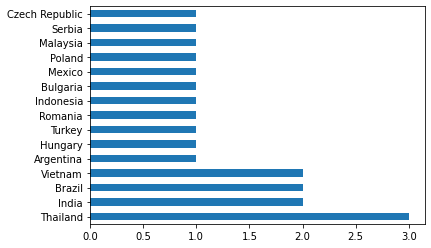

In [ ]:
df_group_budget.Pays.value_counts().plot(kind='barh')

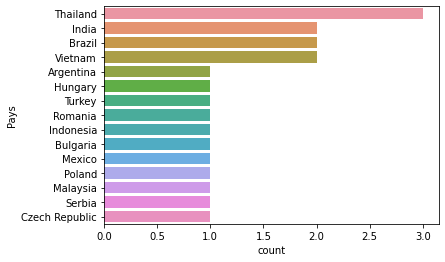

In [ ]:
sns.countplot(y='Pays', data=df_group_budget, order=df_group_budget['Pays'].value_counts().index)

## **Meilleures destinations pour une personne souhaitant une bonne connexion et beaucoup de lieu de travail partagé**

In [ ]:
df.columns

Index(['Rang', 'Ville', 'Pays', 'Vitesse moyenne Wifi',
       'Lieu de travail partagé', 'Prix moyen café', 'Prix moyen Taxi par km',
       'Prix 2 bières', 'Prix moyen d un appartement 1 chambre',
       'Prix moyen restaurant', 'Nombre d heures de plein soleil',
       'Choses à faire', 'Nombre de # sur Instagram'],
      dtype='object')

In [ ]:
df_travail = df[ ['Ville', 'Pays','Lieu de travail partagé','Vitesse moyenne Wifi']]
df_travail

,Ville,Pays,Lieu de travail partagé,Vitesse moyenne Wifi
0,Bangkok,Thailand,117,28
1,New Delhi,India,165,12
2,Lisbon,Portugal,95,33
3,Barcelona,Spain,136,37
4,Buenos Aires,Argentina,67,17
...,...,...,...,...
142,Beirut,Lebanon,18,4
143,Zurich,Switzerland,42,33
144,Geneva,Switzerland,23,36
145,Valletta,Malta,1,10


In [ ]:
cond_lieu = df_travail['Lieu de travail partagé'] >80
cond_wifi = df_travail['Vitesse moyenne Wifi'] >20
df_group_travail = df_travail[cond_lieu & cond_wifi][:20]
df_group_travail

,Ville,Pays,Lieu de travail partagé,Vitesse moyenne Wifi
0,Bangkok,Thailand,117,28
2,Lisbon,Portugal,95,33
3,Barcelona,Spain,136,37
6,Mumbai,India,152,23
11,Madrid,Spain,125,32
21,Singapore,Singapore,117,93
29,Los Angeles,United States,105,58
32,Hong Kong,Hong Kong,183,78
38,Berlin,Germany,127,33
40,Tokyo,Japan,163,32


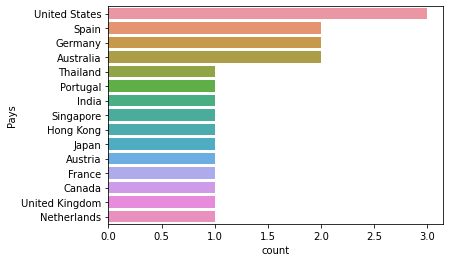

In [ ]:
sns.countplot(y='Pays', data=df_group_travail, order = df_group_travail['Pays'].value_counts().index)

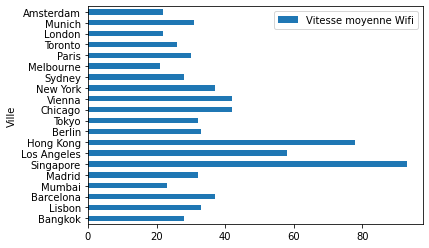

In [ ]:
df_group_travail.plot(x = 'Ville', y='Vitesse moyenne Wifi', kind = 'barh' )

## **Meilleures destinations pour une personne souhaitant beaucoup d'activité et un beau temps**

In [ ]:
df.columns

Index(['Rang', 'Ville', 'Pays', 'Vitesse moyenne Wifi',
       'Lieu de travail partagé', 'Prix moyen café', 'Prix moyen Taxi par km',
       'Prix 2 bières', 'Prix moyen d un appartement 1 chambre',
       'Prix moyen restaurant', 'Nombre d heures de plein soleil',
       'Choses à faire', 'Nombre de # sur Instagram'],
      dtype='object')

In [ ]:
df_loisir = df[ ['Ville', 'Pays','Choses à faire', 'Nombre de # sur Instagram', 'Nombre d heures de plein soleil'] ]
df_loisir

,Ville,Pays,Choses à faire,Nombre de # sur Instagram,Nombre d heures de plein soleil
0,Bangkok,Thailand,2262,28386616,2624
1,New Delhi,India,2019,28528249,2685
2,Lisbon,Portugal,1969,10205538,2806
3,Barcelona,Spain,2739,62894055,2591
4,Buenos Aires,Argentina,1660,21293975,2525
...,...,...,...,...,...
142,Beirut,Lebanon,188,10239115,3534
143,Zurich,Switzerland,485,6904776,1566
144,Geneva,Switzerland,300,4329235,1828
145,Valletta,Malta,144,764698,3054


In [ ]:
cond_soleil = df_loisir['Nombre d heures de plein soleil'] >2000
cond_caf = df_loisir['Choses à faire']>1500
cond_instagram = df_loisir['Nombre de # sur Instagram']>500000
df_group_loisir = df_loisir[cond_soleil & cond_caf & cond_instagram][:20]
df_group_loisir

,Ville,Pays,Choses à faire,Nombre de # sur Instagram,Nombre d heures de plein soleil
0,Bangkok,Thailand,2262,28386616,2624
1,New Delhi,India,2019,28528249,2685
2,Lisbon,Portugal,1969,10205538,2806
3,Barcelona,Spain,2739,62894055,2591
4,Buenos Aires,Argentina,1660,21293975,2525
7,Istanbul,Turkey,2088,116213193,2218
9,Phuket,Thailand,1698,10190220,3450
11,Madrid,Spain,1976,44165754,2769
14,Rio de Janeiro,Brazil,1607,43041426,2187
21,Singapore,Singapore,1561,41453533,2022


## **Merger les DataFrame afin de trouver des compromis**

### **Compromis petit budget et loisirs**

Les personnes ayant un budget serré peuvent aussi vouloir profiter de leur voyage, nous devons donc joindre la DataFrame df_group_budget et df_group_loisir avec un inner join afin d'afficher seulement les lignes où il n'y à pas de valeurs manquantes


In [ ]:
df_budget_loisir = df_group_budget.merge(df_group_loisir, how='inner')
df_budget_loisir

,Ville,Pays,Prix moyen Taxi par km,Prix moyen d un appartement 1 chambre,Prix 2 bières,Prix moyen restaurant,Choses à faire,Nombre de # sur Instagram,Nombre d heures de plein soleil
0,Bangkok,Thailand,0.82,415.18,3.08,1.54,2262,28386616,2624
1,New Delhi,India,0.19,179.25,2.90,2.90,2019,28528249,2685
2,Buenos Aires,Argentina,0.47,229.55,2.16,5.15,1660,21293975,2525
3,Istanbul,Turkey,0.29,230.10,3.34,2.92,2088,116213193,2218
4,Phuket,Thailand,0.76,301.08,3.92,2.72,1698,10190220,3450
5,Rio de Janeiro,Brazil,0.42,264.92,2.26,4.59,1607,43041426,2187


### **Compromis petit budget et bonnes conditions de travail**

In [ ]:
df_budget_travail = df_group_budget.merge(df_group_travail, how='inner')
df_budget_travail

,Ville,Pays,Prix moyen Taxi par km,Prix moyen d un appartement 1 chambre,Prix 2 bières,Prix moyen restaurant,Lieu de travail partagé,Vitesse moyenne Wifi
0,Bangkok,Thailand,0.82,415.18,3.08,1.54,117,28
1,Mumbai,India,0.22,419.64,3.28,2.90,152,23


### **Fusion des 3 DataFrame pour regrouper les 3 critères**

In [ ]:
df_all = df_budget_loisir.merge(df_group_travail, how = 'inner')
df_all

,Ville,Pays,Prix moyen Taxi par km,Prix moyen d un appartement 1 chambre,Prix 2 bières,Prix moyen restaurant,Choses à faire,Nombre de # sur Instagram,Nombre d heures de plein soleil,Lieu de travail partagé,Vitesse moyenne Wifi
0,Bangkok,Thailand,0.82,415.18,3.08,1.54,2262,28386616,2624,117,28


**Nous pouvons ainsi constater que pour une personne désirant un compromis avec les 3 conditions, la meilleure destination est la ville de Bang**